In [6]:
import tensorflow as tf
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense
import matplotlib.pyplot as plt

In [7]:
max_features = 10000
max_len = 500
batch_size = 32

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

Simple RNN:

In [8]:
model_rnn = Sequential([
    Embedding(max_features, 32, input_length=max_len),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])

model_rnn.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)

history_rnn = model_rnn.fit(
    X_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.3
)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


137/137 ━━━━━━━━━━━━━━━━━━━━ 26s 176ms/step - acc: 0.5397 - loss: 0.6875 - val_acc: 0.7380 - val_loss: 0.5641
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 23s 171ms/step - acc: 0.7760 - loss: 0.4921 - val_acc: 0.7527 - val_loss: 0.5087
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 25s 181ms/step - acc: 0.8463 - loss: 0.3644 - val_acc: 0.8440 - val_loss: 0.3849
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 24s 173ms/step - acc: 0.8907 - loss: 0.2746 - val_acc: 0.8236 - val_loss: 0.4156
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 41s 176ms/step - acc: 0.9191 - loss: 0.2173 - val_acc: 0.8373 - val_loss: 0.3873


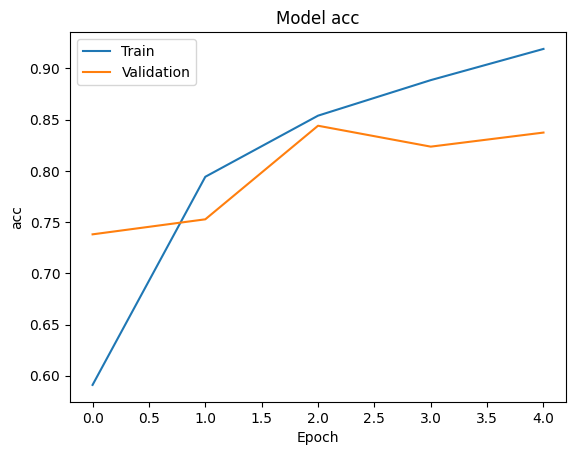

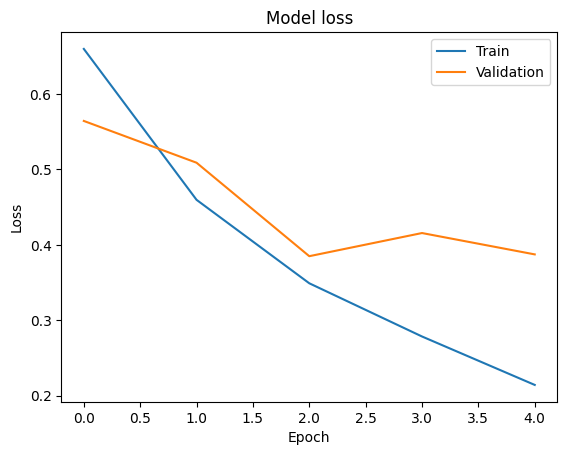

In [11]:
history = history_rnn

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [12]:
test_loss, test_acc = model_rnn.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - acc: 0.8368 - loss: 0.3912
Test accuracy: 0.841480016708374


LSTM:

In [13]:
model_lstm = Sequential([
    Embedding(max_features, 32, input_length=max_len),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)

history_lstm = model_lstm.fit(
    X_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.3
)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


137/137 ━━━━━━━━━━━━━━━━━━━━ 47s 326ms/step - acc: 0.5459 - loss: 0.6794 - val_acc: 0.7716 - val_loss: 0.4922
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 51s 376ms/step - acc: 0.7919 - loss: 0.4617 - val_acc: 0.8296 - val_loss: 0.3880
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 76s 330ms/step - acc: 0.8503 - loss: 0.3590 - val_acc: 0.8535 - val_loss: 0.3457
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 81s 327ms/step - acc: 0.8690 - loss: 0.3198 - val_acc: 0.8136 - val_loss: 0.4600
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 50s 365ms/step - acc: 0.8898 - loss: 0.2795 - val_acc: 0.8493 - val_loss: 0.3833


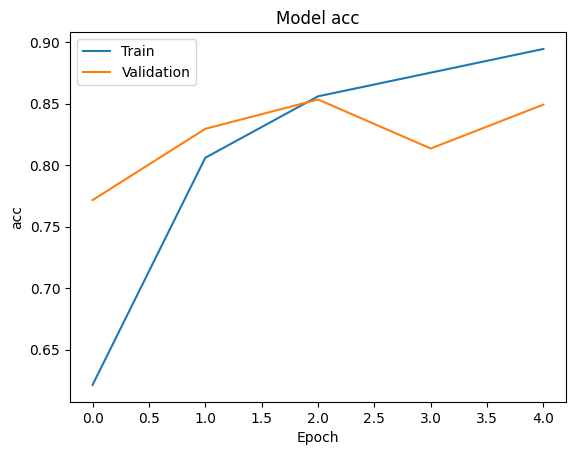

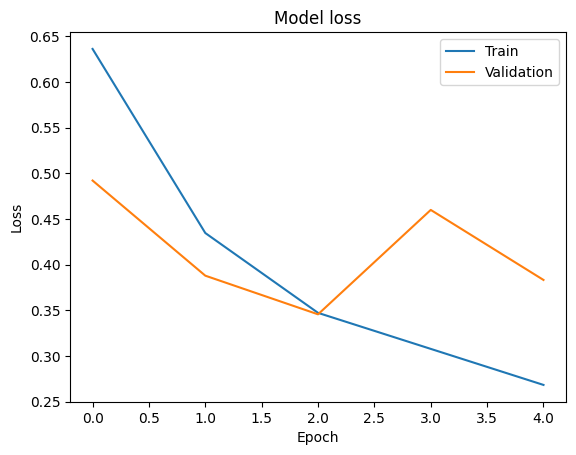

In [14]:
history = history_lstm

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [15]:
test_loss, test_acc = model_lstm.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - acc: 0.8414 - loss: 0.3944
Test accuracy: 0.839680016040802


BRNN:

In [20]:
model_blstm = Sequential([
    Embedding(max_features, 32, input_length=max_len),
    Bidirectional(LSTM(32)),
    Dense(1, activation='sigmoid')
])

model_blstm.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)

history_blstm = model_blstm.fit(
    X_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.3
)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


137/137 ━━━━━━━━━━━━━━━━━━━━ 91s 637ms/step - acc: 0.5384 - loss: 0.6855 - val_acc: 0.6903 - val_loss: 0.5861
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 87s 635ms/step - acc: 0.7795 - loss: 0.4823 - val_acc: 0.8351 - val_loss: 0.3850
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 142s 633ms/step - acc: 0.8479 - loss: 0.3644 - val_acc: 0.8308 - val_loss: 0.4098
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 87s 635ms/step - acc: 0.8684 - loss: 0.3263 - val_acc: 0.8744 - val_loss: 0.3037
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 140s 622ms/step - acc: 0.8888 - loss: 0.2850 - val_acc: 0.8827 - val_loss: 0.2926


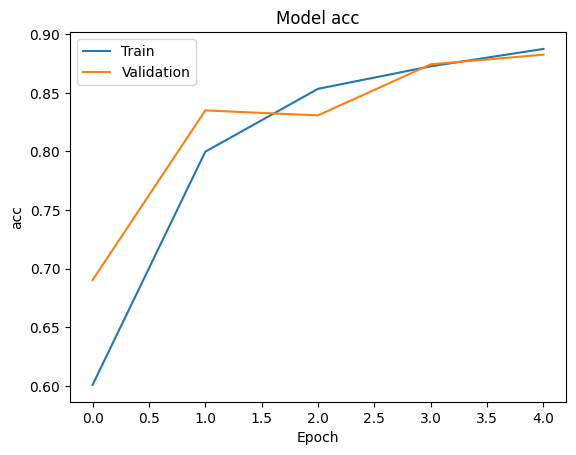

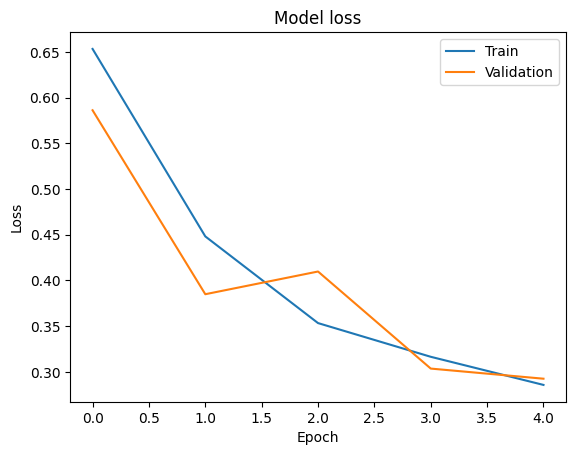

In [21]:
history = history_blstm

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [22]:
test_loss, test_acc = model_blstm.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 74ms/step - acc: 0.8734 - loss: 0.3078
Test accuracy: 0.8770400285720825


DRNN:

In [25]:
model_dlstm = Sequential([
    Embedding(max_features, 32, input_length=max_len),
    Bidirectional(LSTM(32, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(1, activation='sigmoid')
])

model_dlstm.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)

history_dlstm = model_dlstm.fit(
    X_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.3
)

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 194s 1s/step - acc: 0.5283 - loss: 0.6867 - val_acc: 0.7588 - val_loss: 0.5141
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - acc: 0.7810 - loss: 0.4777 - val_acc: 0.7784 - val_loss: 0.4770
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 186s 1s/step - acc: 0.8441 - loss: 0.3626 - val_acc: 0.8756 - val_loss: 0.3178
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 187s 1s/step - acc: 0.8750 - loss: 0.3084 - val_acc: 0.8488 - val_loss: 0.3497
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - acc: 0.8963 - loss: 0.2567 - val_acc: 0.8735 - val_loss: 0.3106


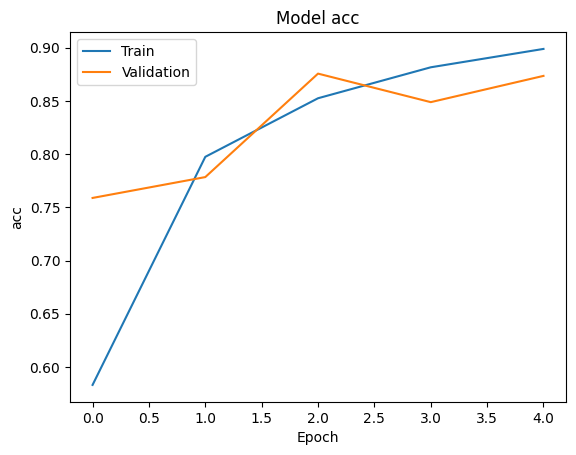

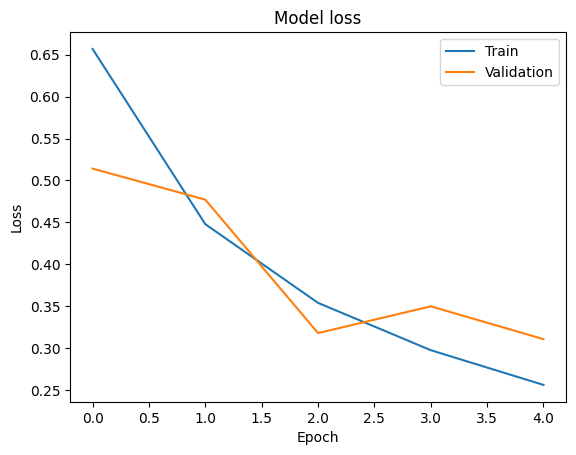

In [26]:
history = history_dlstm

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [27]:
test_loss, test_acc = model_dlstm.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 118s 151ms/step - acc: 0.8690 - loss: 0.3194
Test accuracy: 0.8717600107192993


Найкращі результати показала BRNN, оскільки вона враховує контекст слів з обох напрямків.
LSTM показала нижчу точність у порівнянні з іншими архітектурами. Модель не встигає повністю навчитися, що негативно впливає на якість класифікації.
Збільшення глибини мережі не завжди призводить до покращення результатів.